<a href="https://colab.research.google.com/github/SahanRachintha/Spaceship-Titanic/blob/main/Spceship_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import ydf

In [ ]:
test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')

In [ ]:
train_df.shape

(8693, 14)

In [ ]:
train_df.head(15)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train_df_new=train_df.copy()
test_df_new=test_df.copy()

In [ ]:
train_df_new=train_df_new.drop(['PassengerId','Name','Cabin'],axis=1)
test_df_new=test_df_new.drop(['PassengerId','Name','Cabin'],axis=1)

In [ ]:
train_df_new['HomePlanet']=train_df_new['HomePlanet'].fillna(train_df_new['HomePlanet'].mode())
train_df_new['CryoSleep']=train_df_new['CryoSleep'].fillna(train_df_new['CryoSleep'].mode())
train_df_new['Destination']=train_df_new['Destination'].fillna(train_df_new['Destination'].mode())
train_df_new['VIP']=train_df_new['VIP'].fillna(train_df_new['VIP'].mode())

In [ ]:
train_df_new['RoomService']=train_df_new['RoomService'].fillna(train_df_new['RoomService'].mean())
train_df_new['FoodCourt']=train_df_new['FoodCourt'].fillna(train_df_new['FoodCourt'].mean())
train_df_new['ShoppingMall']=train_df_new['ShoppingMall'].fillna(train_df_new['ShoppingMall'].mean())
train_df_new['Spa']=train_df_new['Spa'].fillna(train_df_new['Spa'].mean())
train_df_new['VRDeck']=train_df_new['VRDeck'].fillna(train_df_new['VRDeck'].mean())
train_df_new['Age']=train_df_new['Age'].fillna(train_df_new['Age'].mean())


In [ ]:
test_df_new['HomePlanet']=test_df_new['HomePlanet'].fillna(train_df_new['HomePlanet'].mode()[0])
test_df_new['CryoSleep']=test_df_new['CryoSleep'].fillna(train_df_new['CryoSleep'].mode()[0])
test_df_new['Destination']=test_df_new['Destination'].fillna(train_df_new['Destination'].mode()[0])
test_df_new['VIP']=test_df_new['VIP'].fillna(train_df_new['VIP'].mode()[0])

/tmp/ipython-input-1005077141.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df_new['CryoSleep']=test_df_new['CryoSleep'].fillna(train_df_new['CryoSleep'].mode()[0])
/tmp/ipython-input-1005077141.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df_new['VIP']=test_df_new['VIP'].fillna(train_df_new['VIP'].mode()[0])


In [ ]:
test_df_new['RoomService']=test_df_new['RoomService'].fillna(train_df_new['RoomService'].mean())
test_df_new['FoodCourt']=test_df_new['FoodCourt'].fillna(train_df_new['FoodCourt'].mean())
test_df_new['ShoppingMall']=test_df_new['ShoppingMall'].fillna(train_df_new['ShoppingMall'].mean())
test_df_new['Spa']=test_df_new['Spa'].fillna(train_df_new['Spa'].mean())
test_df_new['VRDeck']=test_df_new['VRDeck'].fillna(train_df_new['VRDeck'].mean())
test_df_new['Age']=test_df_new['Age'].fillna(train_df_new['Age'].mean())


In [ ]:
train_df_new=pd.get_dummies(train_df_new, columns=["HomePlanet","CryoSleep","Destination","VIP"],drop_first=True)

In [ ]:
train_df_new.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,True,False


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

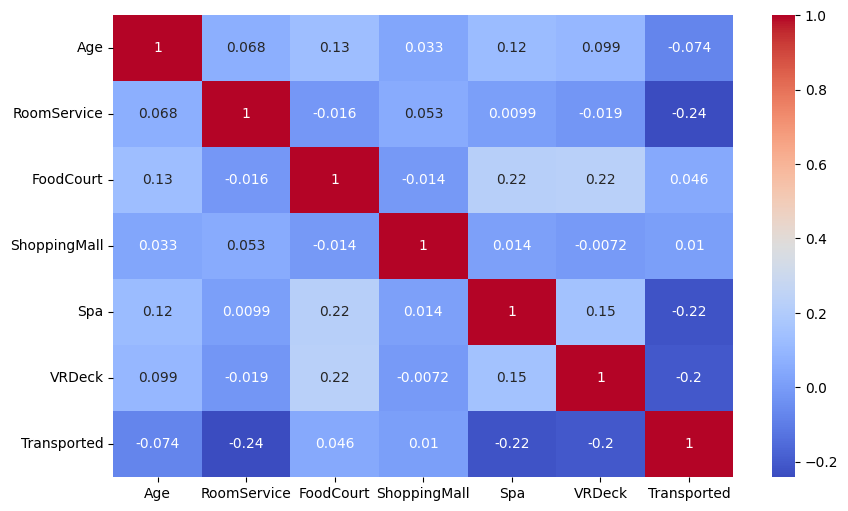

In [ ]:
train_df_new["Transported"] = train_df_new["Transported"].astype(int)

corr_matrix = train_df_new.select_dtypes(include=["int64", "float64"]).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
train_df_new.dtypes


,0
Age,float64
RoomService,float64
FoodCourt,float64
ShoppingMall,float64
Spa,float64
VRDeck,float64
Transported,int64
HomePlanet_Europa,bool
HomePlanet_Mars,bool
CryoSleep_True,bool


In [ ]:
corr_matrix["Transported"].sort_values(ascending=False)


,Transported
Transported,1.000000
FoodCourt,0.046074
ShoppingMall,0.010019
Age,-0.074249
VRDeck,-0.204825
Spa,-0.218791
RoomService,-0.242048


In [ ]:
corr_matrix_new = train_df_new.corr()
corr_matrix_new["Transported"].sort_values(ascending=False)

,Transported
Transported,1.000000
CryoSleep_True,0.460132
HomePlanet_Europa,0.176916
FoodCourt,0.046074
HomePlanet_Mars,0.019544
ShoppingMall,0.010019
Destination_PSO J318.5-22,0.000092
VIP_True,-0.037261
Age,-0.074249
Destination_TRAPPIST-1e,-0.094700


In [ ]:
train_df_new=train_df_new.drop(['Destination_TRAPPIST-1e','Destination_PSO J318.5-22','HomePlanet_Mars','ShoppingMall'],axis=1)

In [ ]:
x=train_df_new.drop('Transported',axis=1)
y=train_df_new['Transported']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_trian,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_scaled,y_trian)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.777458309373203


In [ ]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": coefficients
})

feature_importance["Abs_Coefficient"] = np.abs(feature_importance["Coefficient"])
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)
feature_importance

,Feature,Coefficient,Abs_Coefficient
3,Spa,-2.179550,2.179550
4,VRDeck,-2.073639,2.073639
0,RoomService,-1.044025,1.044025
5,HomePlanet_Europa,0.882140,0.882140
1,FoodCourt,0.794675,0.794675
7,CryoSleep_True,0.613419,0.613419
2,ShoppingMall,0.332276,0.332276
6,HomePlanet_Mars,0.269330,0.269330
9,Destination_TRAPPIST-1e,-0.228942,0.228942
8,Destination_PSO J318.5-22,-0.143021,0.143021


/tmp/ipython-input-1170034583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Abs_Coefficient", y="Feature", data=feature_importance, palette="viridis")


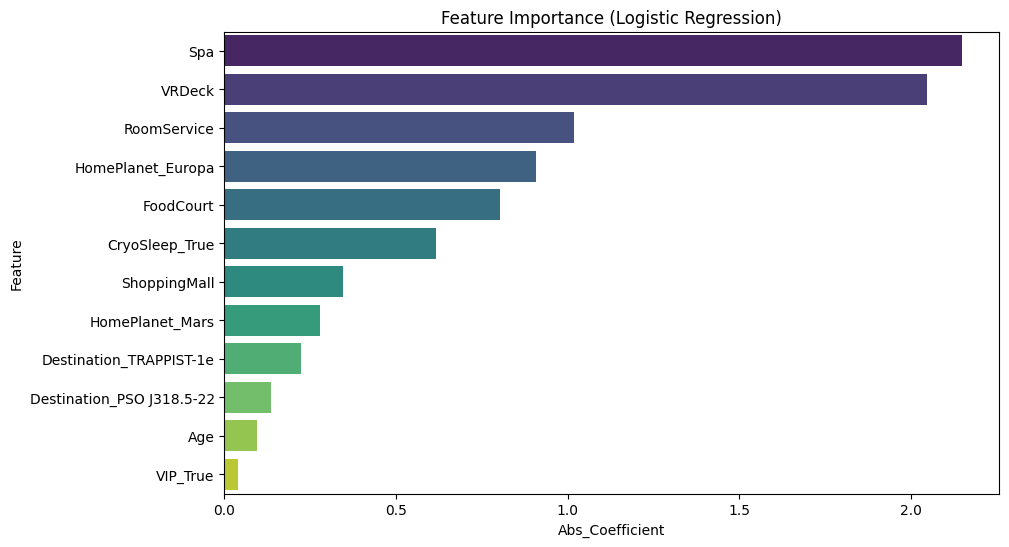

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Abs_Coefficient", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

In [ ]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   bool   
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
dtypes: bool(2), float64(6), object(2)
memory usage: 275.8+ KB


In [ ]:
test_df_new.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [ ]:
test_df_new.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [ ]:
test_df_new=test_df_new.reindex(columns=x.columns, fill_value=0)

In [ ]:
x_test_final=scaler.transform(test_df_new)

In [ ]:
test_predictions=model.predict(x_test_final)
test_predictions=test_predictions.astype(bool)

In [ ]:
submission=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Transported':test_predictions})

In [ ]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
submission.shape

(4277, 2)

In [ ]:
submission.to_csv('submission.csv',index=False)

In [14]:
!git clone https://github.com/SahanRachintha/Spaceship-Titanic.git

Cloning into 'Spaceship-Titanic'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [15]:
%cd Spaceship-Titanic


/Spaceship-Titanic


In [16]:
!ls


README.md


In [19]:
!cp /content/Spaceship-Titanic/Spceship-kaggle.ipynb .



cp: cannot stat '/content/Spaceship-Titanic/Spceship-kaggle.ipynb': No such file or directory
